# General data questions and exploration


In [1]:
### Initialisation ###
import os
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = [6, 4]

EVENT_NAME = Event.objects.all()[0].name.replace(' ', '')
DIR = './data/harvey_user_location/'
DF_FILENAME = 'df_users.csv'
LATEX_DAT_PATH = DIR + 'latex/' + 'harvey-exploration.dat'
LATEX_TABLE_PATH = DIR + 'latex/' + 'harvey-exploration-tabs.dat'

# Confirm correct database is set in Django settings.py
if 'Harvey' not in EVENT_NAME:
    raise Exception('Event name mismatch -- check database set in Django')

for file in [LATEX_DAT_PATH, LATEX_TABLE_PATH]:
    try:    
        os.remove(file)
    except:
        pass

# Open original Dataframe
users_df = pd.read_csv(DIR + DF_FILENAME, index_col=0)
users_df.shape

(1500, 46)

In [2]:
from tex_funcs import set_tex_var as set_tex_var_import

def set_tex_var(name, val, dec=3):
    set_tex_var_import(name, val, LATEX_DAT_PATH, dec)
    
#     """
#     Define a value as a latex variable to be
#     imported into Latex file with (e.g.):
#     \input{data/harvey-coding.dat}

#     NOTE: does not look for duplicate variable definitions.
#     """
#     if isinstance(val, float):
#         template = r'\newcommand{{\{}}}{{{:,.' + str(dec) + r'f}}}'
#     elif isinstance(val, int):
#         template = r'\newcommand{{\{}}}{{{:,}}}'
#     else:
#         template = r'\newcommand{{\{}}}{{{}}}'
#     with open(LATEX_DAT_PATH, 'a') as a_writer:
#         a_writer.write(template.format(name, val) + '\n')

In [3]:
from tex_funcs import df_to_tex as df_to_tex_import

def df_to_tex(df, cols=None, label='UNNAMED', caption='UNDEFINED', 
    width=0.8, row_sep=1, col_widths=None, dec_dict=None,sum_row=False):
    df_to_tex_import(df, LATEX_TABLE_PATH, cols, label, caption, width, row_sep, col_widths, dec_dict,sum_row)


# def sanitise_tex_str(string):
#     '''
#     Sanitises string for use in Latex
#     NOTE: Incomplete
#     '''
#     string = string.replace('&', '\&')
#     string = string.replace('%', '\%')
#     return string


# def df_to_tex(df, cols=None, label='UNNAMED', caption='UNDEFINED', 
#               width=0.8, row_sep=1, col_widths=None, dec_dict=None,
#              sum_row=False):
#     '''
#     Generates a latex table from a dataframe, 
#     to be copied by user from output file to tex
    
#     NOTE: format columns in the dataframe before passing to func, eg:
#         df[col] = df[col].astype(int).map('{:.1f}%'.format)
#         df.rename(columns={"A": "a", "B": "c"}, inplace=True)
#     NOTE: linewidth and column widths are fixed and require manual adjustment
    
#     input: dataframe and desired columns, 
#             table reference name and caption text
#     output: appends to file LATEX_TABLE_PATH
#     returns: none
#     '''
#     df = df.copy()
#     if not cols:
#         cols = df.columns
#     for col in [x for x in cols if x not in df.columns]:
#         df[col] = ''
#     df = df[cols]
    
#     print('Writing df to file as tex...')
#     with open(LATEX_TABLE_PATH, 'a') as a_writer:
#         a_writer.write('%<*{}>'.format(label) + '\n')
#         a_writer.write('\\begin{table}[H]' + '\n')
#         a_writer.write('  \\small\\vspace{5mm}\\centering\\extrarowsep=' + str(row_sep) + 'mm' + '\n')
#         if not col_widths:
#             col_widths = 'X[-1,lm] ' + ('X[-2,lm] ' * (len(df.columns)-1))
#         a_writer.write('  \\begin{tabu} to ' + str(width) + '\\linewidth { '+ col_widths + '}' + '\n')

#         # Optionally: limit top rule if first column is unnamed.
# #         if cols[0] == '':
# #             a_writer.write('    \\cmidrule[1]{{2-{}}}\n'.format(len(cols)))
# #         else:
# #             a_writer.write('    \\toprule\n')
#         a_writer.write('    \\toprule\n')
        
#         row_string = '    '
#         for col in cols:
#             # If last column, add line ending
#             if col == df.columns[-1]:
#                 row_string += col + ' \\\\\n'
#             else:
#                 # Pad to length of longest column value, plus a fixed amount:
#                 pad = max(df[col].map(str).map(len)) + 4
#                 if pad - len(col) > 18 or len(col) > pad: # (ignore pad for titles if col vals are long)
#                     row_string += (sanitise_tex_str(col) + ' & ')
#                 else:
#                     row_string += (sanitise_tex_str(col).ljust(pad) + '& ')
# #                sum([len(x) for x in cols]) + (len(cols)*3) # Ignore pad if col titles exceed text display width ?
#         a_writer.write(row_string)
        
#         a_writer.write('    \\midrule\n')
        
#         for index, row in df.iterrows():
#             row_string = '    '
#             for col in df.columns:
#                 if col == df.columns[-1]:
#                     if dec_dict and col in dec_dict.keys():
#                         try:
#                             row_string += (sanitise_tex_str(
#                                 ('{:.' + str(dec_dict[col]) + 'f}').format(row[col]) 
#                             ) + ' \\\\\n')
#                         except: # Due to column in percentage format
#                             row_string += (sanitise_tex_str(
#                                 ('{:.' + str(dec_dict[col]) + 'f}%').format(float(row[col].strip('%')))
#                             ) + ' \\\\\n')
#                     else:
#                         row_string += (sanitise_tex_str(str(row[col])) + ' \\\\\n')
#                 else:
#                     pad = max(df[col].map(str).map(len)) + 4
#                     if dec_dict and col in dec_dict.keys(): #dec_dict is used to force decimal places with trailing zeroes
#                         row_string += (sanitise_tex_str(
#                             ('{:.' + str(dec_dict[col]) + 'f}').format(row[col]) 
#                         ).ljust(pad) + '& ')
#                     else:
#                         row_string += (sanitise_tex_str(str(row[col])).ljust(pad) + '& ')
#             a_writer.write(row_string)
        
#         a_writer.write('    \\bottomrule' + '\n')
        
#         # TESTING ########
#         if sum_row:
#             for col in df.columns:
#                 try:
#                     col_sum = sum(df[col])
#                 except:
#                     try:
#                         col_sum = str(sum(df[col].map(lambda x: float(x.strip('%'))))) + '\%'
#                     except:
#                         col_sum = ''
#                 if col == df.columns[-1]:
#                     a_writer.write(str(col_sum) + ' \\\\\n')
#                 else:
#                     a_writer.write(str(col_sum) + ' & ')
#         ################
            
        
#         a_writer.write('  \\end{tabu}' + '\n')
#         a_writer.write('  \\caption[{}]{{{}}}'.format(caption, caption) + '\n')
#         a_writer.write('  \\label{{tab:{}}}'.format(label) + '\n')
#         a_writer.write('\\end{table}' + '\n')
#         a_writer.write('%</{}>'.format(label) + '\n\n\n')

#         return


In [4]:
import pandas as pd
import math
import numpy as np
#from sklearn.metrics import matthews_corrcoef


def confusion_matrix(df: pd.DataFrame, col1: str, col2: str):
    """
    Given a dataframe with at least
    two categorical columns, create a 
    confusion matrix of the count of the columns
    cross-counts
    """
    return (
            df
            .groupby([col1, col2])
            .size()
            .unstack(fill_value=0)
            )


def confusion_matrix_from_series(s1, s2):
    """
    Returns confusion matrix for two binary
    series
    """
    df = pd.concat([s1, s2], axis=1)
    try:
        return confusion_matrix(df, s1.name, s2.name)
    except:
        return confusion_matrix(df, '', '')


def calc_agreement_coefs(df: pd.DataFrame):
    """
    Calculates Cohen's Kappa and
    Krippendorff's Alpha for a
    given confusion matrix.
    
    NOTE: will error if indicies are integers
    """
    arr = df.to_numpy()
    n = arr.sum()
    p_o = 0
    for i in range(len(arr)):
        p_o += arr[i][i]/n
    p_e = 0
    for i in range(len(arr)):
        p_e += (arr.sum(axis=1)[i] *
                arr.sum(axis=0)[i]) / (n*n)
    kappa = (p_o-p_e)/(1-p_e)
    
    phi_num = (arr[0][0]*arr[1][1]) - (arr[0][1]*arr[1][0])
    a = np.sum(conf, axis=1)
    b = np.sum(conf, axis=0)
    phi_denom = math.sqrt(np.prod([a, b], dtype = np.uint64))
    phi = phi_num/phi_denom
    phi_max = min(
        math.sqrt(a[0] * b[1])/math.sqrt(a[1] * b[0]),
        math.sqrt(a[1] * b[0])/math.sqrt(a[0] * b[1])
        )
    phiphimax = phi/phi_max
    
    coin_arr = np.transpose(arr) + arr
    exp_distribution = [sum(x) for x in coin_arr]
    p_e_krippendorf = sum([a * (a-1) for a in exp_distribution])/(2*n*((2*n)-1))
    alpha = (p_o - p_e_krippendorf) / (1-p_e_krippendorf)
    
    return p_o, kappa, alpha, phi, phiphimax


def calc_agreement_metrics(df: pd.DataFrame):
    """
    Calculates various agreement metrics
    for a given binary confusion matrix.
    
    Assumes true condition as ROW heading and
    ascending integer labels.
    """
    arr = df.to_numpy()
    if len(arr) != 2:
        print('ERROR: df is not 2x2')
        return None
    results = {}
    results['Prevalence'] = arr.sum(axis=0)[1]/arr.sum()
    results['Accuracy'] = (arr[0][0] + arr[1][1])/arr.sum()
    results['Prec'] = arr[1][1]/arr.sum(axis=1)[1]
    results['Recall'] = arr[1][1]/arr.sum(axis=0)[1]
    results['f1Score'] = (2 * results['Prec'] * results['Recall'])/(results['Prec']+results['Recall'])
    results['Specificity'] = arr[0][0]/arr.sum(axis=0)[0]
    results['FalseNegRate'] = arr[0][1]/arr.sum(axis=0)[1]
    p_o, kappa, alpha, phi, phiphimax = calc_agreement_coefs(df)
    results['Cohen\'s Kappa'] = kappa
    results['Krippendorff\'s Alpha'] = alpha
    results['Phi Coef / MCC'] = phi
    results['Phi/PhiMax'] = phiphimax
    
    return results
    

## Data Coding

First, given we are treating the data as binary-coded, we need to be aware of the third code of 'unsure'. In most comparisons, these will automatically be considered as the opposite code from what is being tested. We can instead manually set it to either value, or remove it entirely, given that it comprises a small proportion of the data.

In [5]:
unsure_code = (users_df.is_coded_as_witness == 0) & (users_df.is_coded_as_non_witness == 0)
print(sum(unsure_code), 'cases coded as \'unsure\'')

# Remove 'unsure' rows from data:
#users_df = users_df.loc[unsure_code==False]

# Assign 'unsure' rows to positive coded case:
#users_df.is_coded_as_witness = (users_df.is_coded_as_non_witness == False).astype(int)

# Assign 'unsure' rows to negative coded case:
#users_df.is_coded_as_non_witness = (users_df.is_coded_as_witness == False).astype(int)

31 cases coded as 'unsure'


In [6]:
# Printing Coding Totals
# TODO: output to file and bring into Latex (would need to rename codes), add sum row to bottom of table

cs = Coding.objects.filter(coding_id=1).filter(tweet__isnull=False).filter(data_code__data_code_id__gt=0)
fieldname = 'data_code__data_code_id'
counts = cs.values(fieldname).annotate(count=Count(fieldname))#.order_by('-count')

df = pd.DataFrame.from_dict(counts)
df['Code'] = df[fieldname].map(lambda x: DataCode.objects.get(data_code_id=x).name)
df['Proportion'] = df['count'].map(lambda x: '{:.2f}%'.format(x/sum(df['count'])*100))
df = df.rename(columns={'count':'Tweets'})

df = df.sort_values(by ='data_code__data_code_id' )
df = df[['Code', 'Tweets', 'Proportion']]
df

,Code,Tweets,Proportion
4,Aid Request,35,1.40%
3,Ground Truth,375,15.00%
5,Information for Locals,144,5.76%
1,Information for Non-Locals,577,23.08%
2,Thoughts & Emotion - Local,202,8.08%
0,Thoughts & Emotion - Non-Local,603,24.12%
6,Unrelated,564,22.56%


In [7]:
df_to_tex(df, label='coding-tweets-results', caption='Tweets by Code -- Hurricane Harvey', 
          row_sep=0, col_widths='X[-1,lm] X[-1,rm] X[-1,rm]', dec_dict={'Proportion':1}, sum_row=True)

Writing df to file as tex...


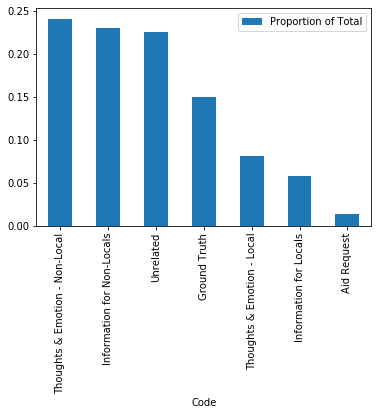

In [8]:
df['Proportion of Total'] = df['Tweets'].map(lambda x: x/sum(df['Tweets']))
df = df.sort_values(by=['Tweets'], ascending=False)
ax = df.plot.bar(x='Code', y='Proportion of Total', rot=90)

fig = ax.get_figure()
fig.savefig(DIR + 'latex/coding-tweets-results.png', bbox_inches='tight')


In [9]:
# Calculate Tweet Coding agreement values and export to tex
# TODO: output conf to latex
codings = Coding.objects.filter(coding_id=2).filter(tweet__isnull=False).filter(data_code__data_code_id__gt=0)

c1 = []
c2 = []
for coding in codings:
    twid = coding.tweet.tweet_id
    c1.append(Coding.objects.filter(coding_id=1).get(tweet__tweet_id=twid).data_code.name)
    c2.append(Coding.objects.filter(coding_id=2).get(tweet__tweet_id=twid).data_code.name)
c1 = pd.Series(c1, name='Coder 1')
c2 = pd.Series(c2, name='Coder 2')
    
conf = confusion_matrix_from_series(c1, c2)
p_o, kappa, alpha, phi, phiphimax = calc_agreement_coefs(conf)

print('Agreement: ', p_o)
print('Alpha: ', alpha)
conf


Agreement:  0.7200000000000001
Alpha:  0.6558993606604212


Coder 2,Aid Request,Ground Truth,Information for Locals,Information for Non-Locals,Thoughts & Emotion - Local,Thoughts & Emotion - Non-Local,Unrelated
Coder 1,,,,,,,
Aid Request,5,0,1,0,0,0,0
Ground Truth,0,33,0,2,0,2,1
Information for Locals,0,0,13,0,0,0,0
Information for Non-Locals,0,7,7,40,1,2,1
Thoughts & Emotion - Local,0,3,0,1,8,3,1
Thoughts & Emotion - Non-Local,1,8,2,7,8,47,0
Unrelated,0,3,2,2,3,2,34


In [10]:
set_tex_var('harveyTwCoded', Coding.objects.filter(coding_id=1).filter(tweet__isnull=False).filter(data_code__data_code_id__gt=0).count())
set_tex_var('harveyTwCodedSecondary', Coding.objects.filter(coding_id=2).filter(tweet__isnull=False).filter(data_code__data_code_id__gt=0).count())
set_tex_var('harveyTwAlpha', alpha, 3)
set_tex_var('harveyTwAgreement', p_o, 3)
set_tex_var('harveyTwKappa', kappa, 3)
if kappa <= 0.2:
    interpretation = 'none to slight agreement'
elif kappa <= 0.4:
    interpretation = 'fair agreement'
elif kappa <= 0.6:
    interpretation = 'moderate agreement'
elif kappa <= 0.8:
    interpretation = 'substantial agreement'
elif kappa < 1:
    interpretation = 'almost perfect agreement'
else:
    interpretation = 'perfect agreement'
set_tex_var('harveyTwKappaInterpretation', interpretation)
set_tex_var('hrvTwHighVal', sum(df[df['Code'].isin(['Ground Truth', 'Aid Request'])]['Proportion of Total'])*100, 1)

In [11]:
#TODO: 
#For example, while the primary coder disagrees with 16.7\% of the messages which the secondary coder classified as `Aid Requests', 
# and 15.4\% of their `Thoughts \& Emotion -- Non-Local', 
# the former represents a single message, whereas the latter comprises 8 instances of disagreement.

In [12]:
# Printing Coding Totals

cs = Coding.objects.filter(coding_id=1).filter(user__isnull=False).filter(data_code__data_code_id__gt=0)
fieldname = 'data_code__data_code_id'
counts = cs.values(fieldname).annotate(count=Count(fieldname))

df = pd.DataFrame.from_dict(counts)
df['Code'] = df[fieldname].map(lambda x: DataCode.objects.get(data_code_id=x).name)
df['Proportion'] = df['count'].map(lambda x: '{:.1f}%'.format(x/sum(df['count'])*100))
df = df.rename(columns={'count':'Users'})

df = df.iloc[::-1][['Code', 'Users', 'Proportion']]
df

,Code,Users,Proportion
2,Witness,385,25.7%
1,Non-Witness,1084,72.3%
0,Unsure,31,2.1%


In [13]:
df_to_tex(df, label='coding-users-results', caption='Users by Code -- Hurricane Harvey', width=0.6,
          row_sep=0, col_widths='X[-1,lm] X[-1,rm] X[-1,rm]', dec_dict={'Proportion':1}, sum_row=True)

# TODO: print other variables to Latex .dat

Writing df to file as tex...


In [14]:
# Calculate Coding agreement values and export to tex

codings = Coding.objects.filter(coding_id=2).filter(user__isnull=False).filter(data_code__data_code_id__gt=0)#.values('user_id')

c1 = []
c2 = []
for coding in codings:
    usid = coding.user.user_id
    c1.append(Coding.objects.filter(coding_id=1).get(user__user_id=usid).data_code.name)
    c2.append(Coding.objects.filter(coding_id=2).get(user__user_id=usid).data_code.name)
c1 = pd.Series(c1, name='Coder 1')
c2 = pd.Series(c2, name='Coder 2')
    
conf = confusion_matrix_from_series(c1, c2)
order = ['Witness', 'Non-Witness', 'Unsure']
conf = conf[order].reindex(order)

p_o, kappa, alpha, phi, phiphimax = calc_agreement_coefs(conf)


print('Agreement: ', p_o)
print('Alpha: ', alpha)
conf


Agreement:  0.835
Alpha:  0.6736722099680289


Coder 2,Witness,Non-Witness,Unsure
Coder 1,,,
Witness,60,5,0
Non-Witness,14,107,8
Unsure,6,0,0


In [15]:
set_tex_var('harveyUsCoded', Coding.objects.filter(coding_id=1).filter(user__isnull=False).filter(data_code__data_code_id__gt=0).count())
set_tex_var('harveyUsCodedSecondary', Coding.objects.filter(coding_id=2).filter(user__isnull=False).filter(data_code__data_code_id__gt=0).count())
set_tex_var('harveyUsAlpha', alpha, 3)
set_tex_var('harveyUsAgreement', p_o, 3)
set_tex_var('harveyUsKappa', kappa, 3)
if kappa <= 0.2:
    interpretation = 'none to slight agreement'
elif kappa <= 0.4:
    interpretation = 'fair agreement'
elif kappa <= 0.6:
    interpretation = 'moderate agreement'
elif kappa <= 0.8:
    interpretation = 'substantial agreement'
elif kappa < 1:
    interpretation = 'almost perfect agreement'
else:
    interpretation = 'perfect agreement'
set_tex_var('harveyUsKappaInterpretation', interpretation)

## Comparison of Codes and Ground Truth Data
Manual coding of users targetted the perceived locality of the user to the event. We can compare the geographic metadata provided by Twitter to these codes to determine their usefulness as a predictor for this value.

### Profile Location Field
The first value to check is the location of a user as set in their profile. This is a user-set string. In an earlier notebook, this string was geocoded using Google Maps api and evaluated for whether it fell within the bounding box defined for this event. We can therefore check whether this test correlates with the coded value.

First, we check what proportion of users provide a value in the field. We can then generate a confusion matrix showing the agreement between the profile locality where provided, and the coded value.

In [16]:
us = User.objects.filter(user_class__gt=0)
#us = us.filter(coding_for_user__coding_id=1, coding_for_user__data_code__data_code_id__gt=0)
tot = us.count()
tot_loc = us.count() - (us.filter(location="") | us.filter(location__isnull=True)).count()

print('Total users: ', tot)
print('Total users with location filled: ', tot_loc)
print('Proportion: {:.4}%'.format((tot_loc/tot)*100))

print('\nProportion of coded users with location filled: {:.4}%'.format((sum(users_df.location.notna())/users_df.shape[0])*100))

print('\nProportion of coded users with parseable location filled: {:.4}%'.format(
    (users_df.loc[(users_df.is_non_local_profile_location + users_df.is_local_profile_location) > 0].shape[0]/users_df.shape[0])*100))

Total users:  31932
Total users with location filled:  25619
Proportion: 80.23%

Proportion of coded users with location filled: 79.4%

Proportion of coded users with parseable location filled: 74.33%


In [17]:
set_tex_var('hrvUsTotal', tot)
set_tex_var('hrvUsTotalLoc', tot_loc)
set_tex_var('hrvUsTotalLocPrp', (tot_loc/tot)*100, 1)
set_tex_var('hrvUsCodedLoc', sum(users_df.location.notna()))
set_tex_var('hrvUsCodedLocPrp', (sum(users_df.location.notna())/users_df.shape[0])*100, 1)
set_tex_var('hrvUsCodedNoLocPrp', (1-sum(users_df.location.notna())/users_df.shape[0])*100, 1)

In [18]:
dft = users_df.loc[users_df.location.notna()]
non_nulls = sum(dft['is_non_local_profile_location']+dft['is_local_profile_location'])

null_returns = dft.shape[0] - non_nulls
null_returns_prop = null_returns/dft.shape[0]*100

print('{} of {} ({:.2f}%) profile locations returned as null'.format(null_returns, dft.shape[0], null_returns_prop))

76 of 1191 (6.38%) profile locations returned as null


In [19]:
set_tex_var('hrvUsPrfLocUnparsable', null_returns)
set_tex_var('hrvUsPrfLocUnparsablePrp', null_returns_prop, 1)

In [20]:
vals = users_df.loc[users_df["is_local_profile_location"] == 1]["is_coded_as_witness"].value_counts()
vals2 = users_df.loc[users_df["is_coded_as_witness"] == 1]["is_local_profile_location"].value_counts()

print('{} of {} ({:.4}%) users were classified as having a local profile'.format(sum(vals), len(users_df), sum(vals)/len(users_df)*100))
print('{} of {} ({:.4}%) users were coded as a witness'.format(sum(vals2), len(users_df), sum(vals2)/len(users_df)*100))
print('{} of {} ({:.4}%) users with local profile locations were coded as witness'.format(vals[1], sum(vals), vals[1]/sum(vals)*100))
print('{} of {} ({:.4}%) witness codes had a local profile'.format(vals2[1], sum(vals2), vals2[1]/sum(vals2)*100))

387 of 1500 (25.8%) users were classified as having a local profile
385 of 1500 (25.67%) users were coded as a witness
249 of 387 (64.34%) users with local profile locations were coded as witness
249 of 385 (64.68%) witness codes had a local profile


In [21]:
# We exclude rows where either no profile location field was provided, 
# or the location was not parsed by the API:
loc_df = users_df.loc[(users_df.is_non_local_profile_location + users_df.is_local_profile_location) > 0]
print(users_df.shape[0] - loc_df.shape[0], 'rows with no parseable profile location value excluded')

conf = confusion_matrix(loc_df, 'is_local_profile_location', 'is_coded_as_witness')
conf

385 rows with no parseable profile location value excluded


is_coded_as_witness,0,1
is_local_profile_location,,
0,662,66
1,138,249


In [22]:
results = calc_agreement_metrics(conf)
res_df = pd.DataFrame.from_dict(results, orient='index', columns=['loc_prof_nona'])
res_df

,loc_prof_nona
Prevalence,0.282511
Accuracy,0.817040
Prec,0.643411
Recall,0.790476
f1Score,0.709402
Specificity,0.827500
FalseNegRate,0.209524
Cohen's Kappa,0.577934
Krippendorff's Alpha,0.576084
Phi Coef / MCC,0.584455


In [23]:
set_tex_var('proflocconfa', conf[0][0])
set_tex_var('proflocconfb', conf[1][0])
set_tex_var('proflocconfc', conf[0][1])
set_tex_var('proflocconfd', conf[1][1])
set_tex_var('hrvUsLocPrfAgr', res_df.loc['Accuracy'][0], 3)
set_tex_var('hrvUsLocPrfAlpha', res_df.loc['Krippendorff\'s Alpha'][0], 3)
set_tex_var('hrvUsLocPrfFsc', res_df.loc['f1Score'][0], 3)
set_tex_var('hrvUsLocPrfPrc', res_df.loc['Prec'][0], 3)
set_tex_var('hrvUsLocPrfRc', res_df.loc['Recall'][0], 3)

As excluding the ~20% of values with no parseable location field provided is not an option in practice, we must decide to either discard them (i.e. by default classify as non-local) or include them (default classify as local). The first option will inevitable discard true positive cases, thus reducing recall, whereas the latter will introduce false positives, reducing precision:

In [24]:
conf = confusion_matrix(users_df, 'is_local_profile_location', 'is_coded_as_witness')
print('loc_prof_notna')
print(conf)
res_df['loc_prof_notna'] = calc_agreement_metrics(conf).values()


conf = confusion_matrix_from_series(
    pd.Series(
                (users_df.is_local_profile_location) | (users_df.location.isna()).astype(int), 
                name='is_local_profile_location_or_na'
             ),
    users_df.is_coded_as_witness)
print('\nloc_prof_orna')
print(conf)
res_df['loc_prof_orna'] = calc_agreement_metrics(conf).values()


res_df

loc_prof_notna
is_coded_as_witness          0    1
is_local_profile_location          
0                          977  136
1                          138  249

loc_prof_orna
is_coded_as_witness                0    1
is_local_profile_location_or_na          
0                                716   88
1                                399  297


,loc_prof_nona,loc_prof_notna,loc_prof_orna
Prevalence,0.282511,0.256667,0.256667
Accuracy,0.817040,0.817333,0.675333
Prec,0.643411,0.643411,0.426724
Recall,0.790476,0.646753,0.771429
f1Score,0.709402,0.645078,0.549491
Specificity,0.827500,0.876233,0.642152
FalseNegRate,0.209524,0.353247,0.228571
Cohen's Kappa,0.577934,0.522099,0.327088
Krippendorff's Alpha,0.576084,0.522257,0.295948
Phi Coef / MCC,0.584455,0.522102,0.362239


In [25]:
set_tex_var('hrvUsLocPrfFscB', res_df.loc['f1Score']['loc_prof_notna'], 3)
set_tex_var('hrvUsLocPrfPrcB', res_df.loc['Prec']['loc_prof_notna'], 3)
set_tex_var('hrvUsLocPrfRcB', res_df.loc['Recall']['loc_prof_notna'], 3)

set_tex_var('hrvUsLocPrfFscC', res_df.loc['f1Score']['loc_prof_orna'], 3)
set_tex_var('hrvUsLocPrfPrcC', res_df.loc['Prec']['loc_prof_orna'], 3)
set_tex_var('hrvUsLocPrfRcC', res_df.loc['Recall']['loc_prof_orna'], 3)

The results above are as expected. Excluding empty fields gives a precision/recall of 0.650/0.668 whereas exluding them gives 0.433/0.793. The exclusion strategy provides the highest f1 score, however given the purpose of the algorithm must be considered when choosing how to weight precision and recall metrics. For example, given the algorithm is designed to curate the feed for human consumption, a high precision is only necessary if the rate of positive cases exceeds the humans' ability to parse the incoming stream. Where the rate is low, sacrificing precision is acceptable to present the human user with more cases which they can then manually filter. 

This concept will be explored in more depth later in the project. For now, it is sufficient to note the values as a baseline model.

### Tweet Stream Coordinates
When posting a Tweet, a user may attach geographic coordinates. The location of the device is provided by the hardware and automatically included with the Tweet (thus the user does not influence the input). A Tweet may also include, instead of specific coordinates, a 'Place' object -- a geographic region (defined by Twitter) which typically describes a location such as a city, state or other similarly-sized region.

To geolocate a user, we can therefore investigate their Twitter feed for any Tweets containing this geographic data and compare these to the bounding box of the observed event. The derived field therefore represents whether *any* of a user's Tweets were identified as 'local' during the event.

For this dataset, the Twitter feed for each observed user spanning the duration of the collection period was collected at the end of the collection period. The feed is therefore made up of Tweets detected during the collection period, and any other Tweets the user made during the period, before or after the detected Tweet, provided they existed at the end of the collection period.

Further work on this area should consider the following:
* Where a local Tweet has been detected, check the proportion of other Tweets containing geographic data.
* Where other geo-Tweets exist, check whether they are from the same point or move around -- consider recoding for where a user Tweets from within *and* without the bounding box.
* Where all geo-Tweets come from the same point, it is likely that location has been manually set (i.e. it is a storefront/business account). This may be verifiable by checking the Tweet source.

In [26]:
# Check proportion of non-stream Tweets which included coordinates:
# Note that given many streams come from geo-detected users, this number may
# over-report general incidence. Removing these Tweets returned a value of 0.5%,
# though this underreports.

with_geotag = Tweet.objects.filter(data_source__lt=1).filter(coordinates_lat__isnull=False).count()
without_geotag = Tweet.objects.filter(data_source__lt=1).filter(coordinates_lat__isnull=True).count()
prop = (with_geotag/(with_geotag+without_geotag))*100

print('{:.1f}% of non-streamed Tweets include geotag'.format(prop))
set_tex_var('hrvTwGeotagPrp', prop, 1)

# Recalculate excluding all geo stream users:
# geo_users = set([tw.author.user_id for tw in Tweet.objects.filter(data_source=3)])
# ts = Tweet.objects.filter(data_source__lt=1).exclude(author__user_id__in=geo_users)
# with_geotag = ts.filter(coordinates_lat__isnull=False).count()
# without_geotag = ts.filter(coordinates_lat__isnull=True).count()
# prop = (with_geotag/(with_geotag+without_geotag))*100
# print('{:.1f}% of non-streamed Tweets include geotag'.format(prop))

1.6% of non-streamed Tweets include geotag


In [27]:
local_tweet = sum(users_df['has_tweet_from_locality'])
prop = local_tweet / users_df.shape[0]*100
print('{} of {} ({:.1f}%) users had a Tweet from local region'.format(local_tweet, users_df.shape[0], prop))

set_tex_var('hrvUsLocalTw', local_tweet)
set_tex_var('hrvUsLocalTwPrp', prop, 1)

467 of 1500 (31.1%) users had a Tweet from local region


In [28]:
conf = confusion_matrix(users_df, 'has_tweet_from_locality', 'is_coded_as_witness')
print('has_tweet_from_locality')
print(conf)

metrics = calc_agreement_metrics(conf)

# metrics['Prec']
# metrics['Recall']
# metrics['f1Score']

dft = pd.DataFrame([['Precision', metrics['Prec']], ['Recall', metrics['Recall']], ['$F_1$ Score', metrics['f1Score']]],
                  columns=['', 'Tweet from Local Region'])

df_to_tex(dft, label='tw-loc-compar', caption='Tweet from Local Region as Locality Predictor', 
          row_sep=0, width=0.4, col_widths='X[-1,lm] X[-2,rm]', dec_dict={'Tweet from Local Region':3})

has_tweet_from_locality
is_coded_as_witness        0    1
has_tweet_from_locality          
0                        898  135
1                        217  250
Writing df to file as tex...


In [29]:
res_df['local_tw'] = metrics.values()
res_df

,loc_prof_nona,loc_prof_notna,loc_prof_orna,local_tw
Prevalence,0.282511,0.256667,0.256667,0.256667
Accuracy,0.817040,0.817333,0.675333,0.765333
Prec,0.643411,0.643411,0.426724,0.535332
Recall,0.790476,0.646753,0.771429,0.649351
f1Score,0.709402,0.645078,0.549491,0.586854
Specificity,0.827500,0.876233,0.642152,0.805381
FalseNegRate,0.209524,0.353247,0.228571,0.350649
Cohen's Kappa,0.577934,0.522099,0.327088,0.425093
Krippendorff's Alpha,0.576084,0.522257,0.295948,0.423173
Phi Coef / MCC,0.584455,0.522102,0.362239,0.428958


While the recall of this metric is close (slightly less than) `loc_prof_notna`, there is no increase in precision and thus it is an inferior metric to predict the true condition.

We can however check whether the metric is capturing a different proportion of local users, and therefore improve upon the existing measures through combination. Using an OR condition will increase recall at the cost of precision; using an AND condition will increase precision at the cost of recall.

In [30]:
conf = confusion_matrix(users_df, 'has_tweet_from_locality', 'is_coded_as_witness')
conf

is_coded_as_witness,0,1
has_tweet_from_locality,,
0,898,135
1,217,250


In [31]:
conf = confusion_matrix_from_series(
    pd.Series(
        ((users_df.is_local_profile_location) | (users_df.has_tweet_from_locality)),
        name = 'is_local_profile_location_or_local_tw'
        ),
    users_df.is_coded_as_witness)
# conf

res_df['loc_prof_notna_or_loc_tw'] = calc_agreement_metrics(conf).values()

conf = confusion_matrix_from_series(
    pd.Series(
        ((users_df.is_local_profile_location) & (users_df.has_tweet_from_locality)),
        name = 'is_local_profile_location_and_local_tw'
        ),
    users_df.is_coded_as_witness)
# conf

res_df['loc_prof_notna_and_loc_tw'] = calc_agreement_metrics(conf).values()

res_df

,loc_prof_nona,loc_prof_notna,loc_prof_orna,local_tw,loc_prof_notna_or_loc_tw,loc_prof_notna_and_loc_tw
Prevalence,0.282511,0.256667,0.256667,0.256667,0.256667,0.256667
Accuracy,0.817040,0.817333,0.675333,0.765333,0.786000,0.796667
Prec,0.643411,0.643411,0.426724,0.535332,0.554983,0.647059
Recall,0.790476,0.646753,0.771429,0.649351,0.838961,0.457143
f1Score,0.709402,0.645078,0.549491,0.586854,0.668046,0.535769
Specificity,0.827500,0.876233,0.642152,0.805381,0.767713,0.913901
FalseNegRate,0.209524,0.353247,0.228571,0.350649,0.161039,0.542857
Cohen's Kappa,0.577934,0.522099,0.327088,0.425093,0.519634,0.410484
Krippendorff's Alpha,0.576084,0.522257,0.295948,0.423173,0.510314,0.405792
Phi Coef / MCC,0.584455,0.522102,0.362239,0.428958,0.543801,0.420639


In [32]:
cols = ['loc_prof_notna', 'local_tw', 'loc_prof_notna_and_loc_tw', 'loc_prof_notna_or_loc_tw']

dft = res_df.loc[res_df.index.isin(['Prec', 'Recall', 'f1Score'])][cols]
dft = dft.reset_index()
dft.columns = ['', 'Local Profile', 'Local Tweet', 'Local Profile $\cap$ Local Tweet', 'Local Profile $\cup$ Local Tweet']
dft[''] = pd.Series(['Precision', 'Recall', '$F_1$ Score'])
dft

,,Local Profile,Local Tweet,Local Profile $\cap$ Local Tweet,Local Profile $\cup$ Local Tweet
0,Precision,0.643411,0.535332,0.647059,0.554983
1,Recall,0.646753,0.649351,0.457143,0.838961
2,$F_1$ Score,0.645078,0.586854,0.535769,0.668046


In [33]:
dec_dict = {k:3 for k in dft.columns[1:]}
df_to_tex(dft, label='composite-loc-compar', caption='Comparison of Composite Predictors', 
          row_sep=0, col_widths='X[-2,lm] X[-1,rm] X[-1,rm] X[-1,rm] X[-1,rm]', dec_dict = dec_dict)

set_tex_var('hrvUsLocPrfUnionPrc', dft['Local Profile $\cup$ Local Tweet'][0],  3)
set_tex_var('hrvUsLocPrfUnionRc', dft['Local Profile $\cup$ Local Tweet'][1],  3)

Writing df to file as tex...


As we can see from the table above, the highest precision is observed from the classifier `loc_prof_notna_and_loc_tw` at 0.656 (though at a great cost to recall). It should be noted that selecting for cases which satisfy both conditions may inadvertently select for a particular (as-yet unidentified) sub-category of user type and exclude other categories of value. The highest fscore comes from `loc_prof_notna_or_loc_tw` at 0.672, which has a precision of 0.558.

While the low scores of these metrics show that they cannot provide meaningful proxies for the manually assigned code, as classifiers they provide a suitable baseline from which to measure more sophisticated models.

## Tweet Source
An important distinguishing metadatum of a Tweet is the 'source' field, which represents the platform from which the Tweet was published. When creating a third-party application which can interact with the Twitter API, a developer must provide a descriptor string which populates this field. Because many third-party applications are designed for specific use-cases, this field provides useful information which characterises the motivations for conditions under which the Tweet was created. For example, the source `TweetMyJOBS` refers to a recruitment platform and thus is attached to Tweets advertising job listings.

We can look at the list of most common source from within the entire dataset and compare this to the sources detected during the collection period. (Note that the complete dataset will still contain a selection bias and does not necessarily characterise regular Twitter use)

In [34]:
# View most common sources from entire dataset:
from django.db.models import Count
from streamcollect.models import Tweet

ts = Tweet.objects.all()

fieldname = 'source'
counts = ts.values(fieldname).order_by(fieldname).annotate(count=Count(fieldname)).order_by('-count')

dft = pd.DataFrame.from_dict(counts[:10])
dft['Proportion'] = (dft['count'].astype(int) / ts.count()*100).map('{:.1f}%'.format)

# Title case for columns:
dft.rename(columns={x: x.title() for x in dft.columns}, inplace=True)

print('Total Tweets:', ts.count())
dft

Total Tweets: 1727438


,Count,Source,Proportion
0,535558,Twitter for iPhone,31.0%
1,348743,Twitter for Android,20.2%
2,342908,Twitter Web Client,19.9%
3,95360,IFTTT,5.5%
4,45830,Twitter for iPad,2.7%
5,43808,Twitter Lite,2.5%
6,42045,Instagram,2.4%
7,32273,TweetDeck,1.9%
8,28536,Facebook,1.7%
9,27105,Hootsuite,1.6%


In [35]:
# Adding descriptions for latex table, based on manual inspection and classification:
descs = [
    'first-party', 'first-party', 'first-party', 'automated process, crossposting', 'first-party',
    'first-party', 'third-party crossposting', 'first-party', 'third-party crossposting', 'social media manager'
]
dft['Description'] = pd.Series(descs)
col_widths = 'X[-1,lm] X[-2,lm] X[-2,lm]'
df_to_tex(dft, cols=['Proportion', 'Source', 'Description'], label='top-tw-sources', caption='Top 10 Tweet Sources', col_widths=col_widths)

Writing df to file as tex...


In [36]:
# Count proportion of Tweets from first-party applications
first_party_sources = [
    'Twitter for iPhone',
    'Twitter for Android',
    'Twitter Web Client',
    'Twitter for iPad',
    'Twitter Lite',
    'TweetDeck',
    'Twitter for Windows',
    'Twitter for Mac',
    'Twitter for Windows Phone',
    'Twitter for BlackBerry',
    'Twitter for Android Tablets',
    'Twitter MMS'
    ]
fp_count = 0
for x in counts:
    if any([y in x['source'] for y in first_party_sources ]):
        fp_count += x['count']
print('{:.1f}% of total from first party clients: {}'.format((fp_count/ts.count()*100), fp_count))

78.5% of total from first party clients: 1355569


In [37]:
# Write to Latex variable
set_tex_var('hrvTwTotal', ts.count())
set_tex_var('hrvTwFP', fp_count)
set_tex_var('hrvTwFPPrp', fp_count/ts.count()*100, 1)

In [38]:
ts = Tweet.objects.filter(data_source=1)
print('Total for data_source=1 (keyword stream):', ts.count())

fieldname = 'source'
counts = ts.values(fieldname).order_by(fieldname).annotate(count=Count(fieldname)).order_by('-count')

dft = pd.DataFrame.from_dict(counts[:10])
dft['Proportion'] = (dft['count'].astype(int) / ts.count()*100).map('{:.1f}%'.format)

# Title case for columns:
dft.rename(columns={x: x.title() for x in dft.columns}, inplace=True)

dft

Total for data_source=1 (keyword stream): 31303


,Count,Source,Proportion
0,8959,Twitter for iPhone,28.6%
1,7989,Twitter Web Client,25.5%
2,5086,Twitter for Android,16.2%
3,1754,Paper.li,5.6%
4,981,Hootsuite,3.1%
5,733,Instagram,2.3%
6,720,IFTTT,2.3%
7,682,Facebook,2.2%
8,658,TweetDeck,2.1%
9,652,Twitter for iPad,2.1%


In [39]:
ts = Tweet.objects.filter(data_source__gt=1, coordinates_lat__isnull=False)
print('Total for data_source=3 (geo stream)', ts.count())

fieldname = 'source'
counts = ts.values(fieldname).order_by(fieldname).annotate(count=Count(fieldname)).order_by('-count')

dft = pd.DataFrame.from_dict(counts[:10])
dft['Proportion'] = (dft['count'].astype(int) / ts.count()*100).map('{:.1f}%'.format)

# Title case for columns:
dft.rename(columns={x: x.title() for x in dft.columns}, inplace=True)

dft

Total for data_source=3 (geo stream) 15569


,Count,Source,Proportion
0,11922,Instagram,76.6%
1,1020,TweetMyJOBS,6.6%
2,928,SafeTweet by TweetMyJOBS,6.0%
3,602,BubbleLife,3.9%
4,267,Foursquare,1.7%
5,234,Untappd,1.5%
6,129,Twitter for Android,0.8%
7,104,Hootsuite,0.7%
8,87,Twitter for iPhone,0.6%
9,55,circlepix,0.4%


In [40]:
# Adding descriptions for latex table, based on manual inspection and classification:
descs = [
    'third-party crossposting', 'job listings', 'job listings', 'social media manager', 'check-in app, crossposting',
    'check-in app, crossposting', 'first-party', 'social media manager', 'first-party', 'real estate listings'
    ]
dft['Description'] = pd.Series(descs)

#col_widths = 'X[-1,lm] X[-2,lm] X[-2,lm]' # Already defined for earlier table
df_to_tex(dft, cols=['Proportion', 'Source', 'Description'], label='top-tw-sources-geo', caption='Top 10 Tweet Sources -- Geographic Stream', col_widths=col_widths)

Writing df to file as tex...


In [41]:
fp_count = 0
for x in counts:
    if any([y in x['source'] for y in first_party_sources ]):
        fp_count += x['count']
print('{:.1f}% of geo stream from first party clients: {}'.format((fp_count/ts.count()*100), fp_count))

1.7% of geo stream from first party clients: 259


In [42]:
set_tex_var('hrvTwGeoTotal', ts.count())
set_tex_var('hrvTwGeoFP', fp_count)
set_tex_var('hrvTwGeoFPPrp', fp_count/ts.count()*100, 1)

val = ts.filter(source='Instagram').count()
set_tex_var('hrvTwGeoInsta', val)
set_tex_var('hrvTwGeoInstaPrp', val/ts.count()*100, 1)

val = ts.filter(source__contains='TweetMyJOBS').count()
set_tex_var('hrvTwGeoJobs', val)
set_tex_var('hrvTwGeoJobsPrp', val/ts.count()*100, 1)

Of the entire dataset of 1,727,438 Tweets, those published by first-party Twitter clients comprised 78.5% (1,355,569). In contrast, of the subset of 15,630 Tweets collected based on their location within the event's bounding box, only 1.7% (262) were published from first-party apps. Tweets crossposted by Instagram comprised 76.6% of the geotagged Tweets. The high incidence of Instagram posts in the geographic stream therefore suggest that Instagram posts are much more likely than Tweets to include geographic data, which is preserved during the crossposting process. We can check the rate across the entire dataset excluding the geo stream:

In [43]:
ts = Tweet.objects.filter(source='Instagram', data_source__lt=3)
print('Total Instagram Tweets (excl. geo stream):', ts.count())
ts_geo = ts.filter(coordinates_lat__isnull=False)
print('Total geotagged Instagram Tweets: {}, {:.1f}%'.format(ts_geo.count(), ts_geo.count()/ts.count()*100 ))

Total Instagram Tweets (excl. geo stream): 30123
Total geotagged Instagram Tweets: 9818, 32.6%


In [44]:
set_tex_var('hrvTwInstaTotalNongeo', ts.count())
set_tex_var('hrvTwInstaGeotagNongeo', ts_geo.count())
set_tex_var('hrvTwInstaGeotagNongeoPrp', ts_geo.count()/ts.count()*100, 1)

In [45]:
ts = Tweet.objects.filter(source__contains='TweetMyJOBS')
print('Total TweetMyJOBS Tweets:', ts.count())
ts_geo = ts.filter(coordinates_lat__isnull=False)
print('Total geotagged TweetMyJOBS Tweets: {}, {:.1f}%'.format(ts_geo.count(), ts_geo.count()/ts.count()*100 ))

Total TweetMyJOBS Tweets: 18517
Total geotagged TweetMyJOBS Tweets: 17150, 92.6%


In [46]:
set_tex_var('hrvTwJobsTotal', ts.count())
set_tex_var('hrvTwJobsGeotag', ts_geo.count())
set_tex_var('hrvTwJobsGeotagPrp', ts_geo.count()/ts.count()*100, 1)

As Instagram posts are traditionally based upon the publication of a recently-taken photo, the high incidence of geotagging makes this class of message highly useful in supporting the development of situational awareness.

Tweets were inspected by category (see code below) to classify the general use-case of each source and eliminate those which were only used for automated/unrelated purposes:

In [47]:
# Investigate Tweets by source to characterise source content:
# (samples are not limited to data_source>0)

ts = Tweet.objects.filter(data_source__gte=1)
fieldname = 'source'
counts = ts.values(fieldname).order_by(fieldname).annotate(count=Count(fieldname)).order_by('-count')
source_list = [x['source'] for x in counts if x['count'] > 10]

for source in source_list:
    print('__________________\n{}:\n'.format(source))
    ts = Tweet.objects.filter(source=source)
    for t in ts.order_by('?')[:15]:
#     for t in ts.filter(data_source__gte=1).order_by('?')[:15]: # To only sample detected Tweets
        print(t.text.replace('\n', ''))

__________________
Instagram:

I available to helpDo workouts and helpRaise money and awareness.So gyms etc. All you have… https://t.co/TQBNx9bIZF
Thanks @haolebubu of @midlandofficial for rocking that slick JT shirt at the @countrymusic… https://t.co/7Q6CNAwTiW
Please donate. This recovery is going to takes years. There is enough wealth in this country to… https://t.co/ma4RRgCvbh
Come on out and see some music. I just learned how to play drums last week so these are bound to… https://t.co/y2wsJS7zcC
#punkybrewster #hiqenergydrink #hiq https://t.co/Gu0vHCngWj
Her get outta my face look. 😝 #zoe #naptime @ San Antonio, Texas https://t.co/u0TDY8eEaH
Really appreciated this guy and his Suburban 😡 #harvey https://t.co/Q3JQijYqdY
We got plenty of room for those in need! @ Woodlands Church Atascocita https://t.co/37ivQQeJbP
I'm perplexed 🤔 #Houston #joelosteen  #hurricaneharvey #harvey https://t.co/Q7qzpai69j
#HURRICANEHARVEY #RESCUE #HELP https://t.co/312nmVWJ97
#LilYachty on the red carpet 

59 años cumpliría hoy el rey del pop #MichaelJackson lo recordamos con sus mayores éxitos y récords https://t.co/bFcJUWFy5R
PSA for #Hurricane #Harvey Victims: Look out for This Consumer Scam Post-Disaster: https://t.co/n4gRtxsrEh https://t.co/YJFFvmUaTS
"The Great State of Texas Shall Overcome!" Photo by TSPS Chapter 9 - Gulf Coast member, Alan McLain #HurricaneHarvey https://t.co/G6PLocl0X5
RT @EricBlake12: @RyanMaue @tcrawf_nh @wxjay Before the storm formed SSTs were half degree above climo using CPC data. #Harvey https://t.co…
14 Boston CEOs you need to follow on Twitter: https://t.co/WhAPXuUJiH #pe #privateequity #corpgov #leadership #vc #venturecapital #sv https://t.co/x7u6z5tUqI
Don't forget to check out this week's Red Dirt Corner feat @PATGREENMUSIC https://t.co/0d5mHBTfBD #texasmusic #countrymusic #dirtroadanthems https://t.co/jMNMaSfJrt
RT @ArianeTabatabai: Before bad translations flood web: Salehi said if US + EU leave JCPOA, Iran will too. If only US, but rest of parties…


RT @SebGorka: BINGO. Sec. Mattis takes on the #FAKENEWSindustrialComplex. https://t.co/q5B003H6QA
No action items at this meeting, just discussion.
RT @JoaquinCastrotx: Texans: be sure to file for #Harvey relief before Sept 1. #TXlege passed a bill making it harder to dispute weather-re…
@chrisricewriter It looks (sounds!) great.
Le Mexique progresse dans des politiques visant à améliorer la qualité. &gt;&gt; https://t.co/pZSlgDpiRb
Cargill Plans to Invest $18 million in Upgrades to Gibbon Grain Elevatorshttps://t.co/qMYEZ0MnqI https://t.co/6Q6qQWPaU4
RT @NHC_Atlantic: Eye of Category 4 #Harvey almost onshore in Texas.  Hurricane force winds reported at many observing stations.  Landfall…
6 of the 7 death penalty review panel attorneys are standing behind Ayala. She says panel is effective immediately https://t.co/C2J0BNXR3v
RT @abc13houston: A possible tornado was reported in northwest Harris County on Barker Cypress https://t.co/wwTP27Ncvk https://t.co/AH0KEgM…
NEXT we'll talk to @ch

I'm at City of Round Rock in TX https://t.co/LORefMwS36
Out of Bounds comedy festival! The Defiant Thomas Brothers were AMAZING 😍 (@ Hideout Coffeehouse in Austin, TX) https://t.co/zNF1AUyYSn
I'm at rivers Edge in Pecan Grove, TX https://t.co/I9EJYaXazx
اللهم إشفى جميع مرضى السرطان و أجعل ما أصابهم تكفيراً لذنوبهم ، واجعل يالله نهاية تعبهم شفاءً لا يغادره سقماً♥️ https://t.co/bbHUpdKjtH
I'm at @A2ndCup in Houston, TX https://t.co/bIMp0ZmMdr
I'm at 78753 https://t.co/ATksNMmpAF
I'm at El Rancho https://t.co/y3Ycsi56A7
Worth the drive. Time for #happyhour and to #feedtheselfie (@ Bernie's Burger Bus) https://t.co/pYV9wD5Dok https://t.co/5K2qmxSgkk
Bladerunner in 4K (@ Alamo @Drafthouse Cinema – South Lamar for Blade Runner: The Final Cut in Austin, TX) https://t.co/xXQyMMAqEO
With hubby and mom in law (@ AMC Rivercenter 9 - @amctheatres for Logan Lucky in San Antonio, TX) https://t.co/QTaY8SNV6p
I'm at Loving Hut Vegan Cuisine in Medan, North Sumatra https://t.co/YSoBCwYTy8
I'm at San Ma

@KCMagicNumber I’m kind of surprised, but I feel this way too. Disappointed and sad.
RT @GallupNews: Trump Job Approval: Approve 34% (-); Disapprove 61% (+1). Get the full trend https://t.co/Dr99ziGB4p.
@linecook @dijkstracula That’s Peter Buck BTW
RT @THR: SAG-AFTRA President Carteris: “We are stronger together” https://t.co/JiiqQ0fFPc https://t.co/bxMy49FuXD
RT @ReaganMatt: Unbelievable Before &amp; After of the flooding on Buffalo Bayou in #Houston from #Harvey. (Via streetreporter on Youtube) http…
Love this!!!! https://t.co/9Qvst8hWy5
RT @Veillerette: Glyphosate : la France votera contre sa ré-autorisation dans l'UE, selon N Hulot @genefutures @EDCFree @EuropePAN  https:…
@arepty @Inferis Not a contest I want to win.
@EricHolthaus @chrislhayes Nope. No thanks. We're done for the year. Maybe next year. Or not. #Irma
Lol!! Make sure y’all have some gurneys and EMS people on standby! https://t.co/JrerQKovym
@NOWCastSA Is there link to Mayor’s presser at EOC starting now?
@DonaldJTrum

https://t.co/pZUNvfu6Zs  #NationalDogDay #HTC17 #HurricaneHarvey #USOpen Taylor Swift Joe Arpaio #VMworld Forever Unbridled Oregon S 26
https://t.co/LOVLxINoTF  #901Day Riley Ferguson Tigers #memwx Darrell Henderson Patrick Taylor Liberty Bowl I-40 #STLCards #HelloSep 28
https://t.co/G6qoPUAMwp  #honestyhour #19YearsLater #ForceFriday Kenya's Supreme Court Verlander Eid Mubarak #LAHeatwave Tyvola Rd # 7
https://t.co/64gNs7yEsH  #ForceFriday #RuinABookTitleInOneLetter #LAHeatwave #DayOfGiving #CriticalRole Lord of the Flies Ohio State 68
https://t.co/G6qoPUAMwp  #HelloSeptember #19YearsLater #TailgatingIn5Words #honestyhour Eid Mubarak Kenya's Supreme Court #ForceFrid 21
https://t.co/XC1BQ3riZM  Manny Wilkins New Mexico State Sun Devils NMSU #RuinABookTitleInOneLetter #AZvsDEN #ASUFootball DACA #Eagle 55
https://t.co/G6qoPUAMwp  Costa Rica #DragonCon DACA #LaborDayWeekend Panera Bread Former Atlanta Hawks #LaTunaFire #FastFoodMovies # 69
https://t.co/uf8oX2RY2P  #DACA #podcast #HelloSep

RT @AP: BREAKING: North Korean leader says the country should conduct more missile tests into the Pacific Ocean.
@galer1en @danaefenty @memschup @rihanna ++ Miaw to vocabulary https://t.co/k43uZx5onB
@TheAnonJournal Can u follow us?
#Everton player Muhamed Besic played in Sunday's 2-0 defeat at #Chelsea, 1 day after discovering his father had been shot! Crazy World!
@abiudrn @atanasi_ Because even in football matches when their team loses they throw stones, ata hiyo wanakuaga wameibwa??
RT @viewfrommyoffic: "He stepped on some floating fireants and Melania burst out laughing, "Liar Liar Pants on Fire Ants on Fire."  Film at…
Reports #British tourist was found crying and naked after been 'gang-raped on #MagalufBeach'#Holiday  #Spain Disgusting Catch these Rapists!
#Breaking #HarrisCounty "plz begin to transfer evacuees to @NRGParkFan" #PublicHealth works to make sure everyone's health is protected.
RT @sciam: Will artificial intelligence enable the third stage of life on Earth? https://

A part lever du capital, embauches et interviews on voit pas trop ce qu'ils ont fait lemonade #insurance #innovation https://t.co/eMuWni36Db
CAT duty for claims adjusters, not fun and the hours are bad. #hurricaneHarvey. https://t.co/ZBFuLgYrI8
HEB on the Way... doing good while doing good business... James Harris Solid Corporate Culture...https://t.co/XLYRlOnqT4
#Harvey #mybcsi #flood https://t.co/sxczuiK9fg
Severe Flooding in South Asia Has Caused More Than 1,200 Deaths This Summer https://t.co/4YjmTIduL4
#Houston #Harvey https://t.co/mpUbLwnk72
#LOVE_ALL!#embroidery, #embroidery_design, #embroidery_digitizing, #design digitizing, @AnnesEmbroidery,  in…https://t.co/8uBgKWMYKk
6 ways to stop blocking your own success https://t.co/n7Ox4eBACx
To prevent the next #HurricaneHarvey, please take a moment 7 read this 5 minute email: https://t.co/yMbOHPWFzP
100% #renewable #energy for 139 nations detailed in #Stanford report https://t.co/I1x6UXzYso
And in other news....... https://t.co/bbV7IP

RT @deonaija: Wizkid set to drop New Single featuring Future https://t.co/w7PRpkWfQH
https://t.co/uHsbbiQTLOstliest disasters in U.S. history. Most victims have no flood insurance.
RT @AlamedaNL: #TeBuscamos Azalea Magdiel Alonso Reyes. Apocada, Nvo. Leon  #NvoLeon https://t.co/lV20x6K0v3
I would say this is the fight of the century but I don't know who gonna be fighting in 2025,2030,2050,2080, and so on #MayweathervMcgregor
RT @AlamedaNL: #TeBuscamos Cecilia Yolotsi Macías Martínez. Nuevo Leon  #NvoLeón https://t.co/zr63u89pN2
Hopefully, for the energy sector, the NAFTA renegotiation will, as the French put it, faire avancer le schmilblick.
RT @deo_whizard: WORLD EXCLUSIVE: Floyd ‘MONEY’ Mayweather’s EX-Girlfriend makes a shocking claim that Conor McGregor actually... https://t…
RT @cliffordlevy: Breaking from NYT: Trump associate boasted that a deal to build a Trump tower in Moscow “will get Donald elected"https:…
Above-average sea surface temperatures in the Gulf of Mexico provided 

La minería será "el sector más ganador de la próxima década", según Walter Spurrier ► https://t.co/l65RQAvaTi… https://t.co/gv4euC0Fcv https://t.co/ZsRWvdsXdB
Breaking: Syrian Army liberates two more towns in central Syria https://t.co/nzXITVaIJP https://t.co/V31j1j3z3C
PGR ofrece 1.5 mdp de recompensa https://t.co/tOTKxJsexj #seguridad #CecilioPineda #PGR #Recompensa #Hazclik https://t.co/9Psgnh68Va
FEMA administrator says Harvey recovery will take "years" https://t.co/N2mo6lRkbA https://t.co/5S7ZflJrGW
Trump's low approval ratings set an unwanted record https://t.co/OqkgzJ7eyq https://t.co/x7WOXQxyNp
Refinery closures could spur rise in gas prices https://t.co/KpX30sNEm8
Seattle Street Closed Due To Accident https://t.co/mmcD1NVXk3 https://t.co/vXJQUoIzIw
Marines Are In Houston In Violation of the Constitution https://t.co/g1uTk1DbNE https://t.co/lgu68pLZFa
Uber officially welcomes as CEO Expedia's Dara Khosrowshahi https://t.co/6qnyQWpdEy https://t.co/6dPBn2apmg
Contradicting Trump,

https://t.co/y8BV4PPmJD  #ShaheedNawabAkbarBugti #BelgianGP #DVCVPCH #Harvey #srfarena Bondo Zurich #BritishGP #Bergell #climatechan 96
https://t.co/zo6VYCGAcj  #FlickerSessionsDublin Bastogne #bargoens #WaregemKoerse #usopen #Harvey Japan Kylian Hazard Côte Vlaamse 28
https://t.co/y8BV4PPmJD  #bakeoffVL Dilbeek #Usopen2017 #kernuitstap #Venezia74 #Harvey Google Amina Borgerhout Bangladesh 98
https://t.co/y8BV4PPmJD  #BelgianGP #TheVoiceKids #DVglpCH #Harvey #MayweatherMcGregor Geneva Zurich Larousse du XXe Germany #AIBAFa 99
https://t.co/1xwH42iSRr  #Indonesia #WGAFF #USOpen #LionMums2 #Harvey S. Korean Arsenal Japan Taylor Swift Game of Thrones 71
https://t.co/zo6VYCGAcj  #BelgianGP #DVCVPCH #Harvey #srfarena #Unspunnen Bondo Belgium Zurich #srfGP #AIBAFamily 26
https://t.co/I63Req40YP  #GameOfThrones #Harvey #19h30RTS Mireille Darc #cinesposito #innovation Texas Rentenplan der FDP Fragen Gen 51
https://t.co/y8BV4PPmJD  #MumbaiRains #NorthKorea Sheik Farhan #Indonesia Kim Jong Un #US

TOR Warning issued  for Jasper &amp; Newton Co. until 10:00 AM TOR: Radar Indicated" #txwx #harvey
A TOR WARNING REMAINS IN EFFECT UNTIL 1245 PM CDT FOR SOUTHEASTERN AUSTIN AND NORTHWESTERN FORT BEND Co. #txwx
TOR Warning issued  for Galveston &amp; Harris Co. until 04:15 AM TOR: Radar Indicated" #txwx #harvey
TOR Warning issued  for Matagorda &amp; Wharton Co. until 01:30 AM TOR: Radar Indicated" #txwx #harvey
TOR Warning issued  for Fort Bend &amp; Waller Co. until 02:30 AM TOR: Radar Indicated" #txwx #harvey
SVR TSTORM Warning issued  for Dallam &amp; Sherman Co. until 06:45 PM Hail: 1.25", Wind: 60 MPH #txwx #harvey
TOR Warning issued  for Chambers &amp; Liberty Co. until 01:00 AM TOR: Radar Indicated" #txwx #harvey
TOR Warning issued  for Austin, Fort Bend &amp; Wharton Co. until 02:00 AM TOR: Radar Indicated" #txwx #harvey
A TOR WARNING REMAINS IN EFFECT UNTIL 1245 AM CDT FOR NORTHEASTERN JEFFERSON AND SOUTHEASTERN ORANGE Co. #txwx
TOR Warning issued  for Jefferson Co. until 08:1

* Instagram -- Crossposting images
* Twitter for iPhone
* Twitter Web Client
* Twitter for Android
* Paper.li -- Automated, seems like spam from a single source
* Hootsuite -- Suite, but appears to be used by 'regular users'
* TweetMyJOBS -- Automated job listings
* SafeTweet by TweetMyJOBS -- Automated job listings
* IFTTT -- Appears to be commonly used for cross-posting from eg Instagram
* Facebook
* TweetDeck
* Twitter for iPad
* BubbleLife -- Suite, news
* Twitter Lite
* Buffer -- Suite, news
* Foursquare -- Crossposting check-in app, sometimes informative, but mostly "I'm at x" template
* Untappd -- Crossposting check-in app (for beer drinkers), rarely informative
* SocialNewsDesk -- Suite, news
* Sprout Social -- Suite, news
* Error-log -- Automated bot / spam
* Botize -- All in Spanish, appeared to be only news
* Tweetbot for iΟS -- third-party app, regular users
* Periscope -- Crossposting, live video feeds
* VoiceStorm -- Suite, CRM
* Twitter for Windows
* Google -- Crossposting, mostly from Youtube (user likes or posts a video)
* Hearsay Social -- Suite, news
* despa ringtones -- Automated bot / spam
* circlepix -- Automated retail listings
* TweetCaster for Android -- Third party app
* TownTweet -- Automated forecasts
* Twitter for Mac
* Mobile Web (M2) -- (mobile.twitter.com)
* HubSpot -- Suite, CRM
* Crowdfire - Go Big -- Suite, news
* iOS
* Sprinklr -- Suite, CRM
* LinkedIn -- News article links
* Echofon -- Third-party app, regular users
* SeeYourWeather.com Galveston -- Automated weather bot
* WordPress.com -- Automated blog reposting
* GaggleAMP -- Suite, recruitment
* Twitter for Windows Phone
* Twitter for Android Tablets
* Radian6 -Social Media Management -- Automated news
* Convey: Make it post for you -- Automated news
* Cloudhopper -- Appears to be a Suite, CRM
* dlvr.it -- Automated news
* Twitter for BlackBerry
* Squarespace -- Automated blog reposting
* SocialFlow -- Suite, news
* Donate a Photo -- Looks like some J&J sponsored app
* Twitterrific -- Third-party app, regular users
* a7aa7o -- Automated bot / spam
* CoSchedule -- Suite, CRM
* despacitoapp -- Automated bot / spam
* shortage bot -- Automated bot / spam
* Bambu by Sprout Social -- Suite, CRM
* SocialPilot.co -- Suite, CRM
* Weather Message -- Automated weather reports
* RadarScope -- Weather enthusiast app


Therefore a list of sources can be created which are not used by 'regular users':

We can now compare the rate of useful messages for each source categorisation:

In [48]:
fp = ['Twitter for iPhone',
 'Twitter Web Client',
 'Twitter for Android',
 'TweetDeck',
 'Twitter for iPad',
 'Twitter Lite',
 'Twitter for Windows',
 'Twitter for Mac',
 'Mobile Web (M2)',
 'iOS',
 'Twitter for Windows Phone',
 'Twitter for Android Tablets',
 'Twitter for BlackBerry']

tp = [
 'Tweetbot for iΟS',
 'TweetCaster for Android',
 'Echofon',
 'Twitterrific']
      
cross = ['Instagram',
 'IFTTT',
 'Facebook',
 'Foursquare',
 'Untappd',
 'Periscope',
 'Google',
 'LinkedIn',
 'WordPress.com',
 'Squarespace',
 'RadarScope']

cross2 = ['IFTTT',
 'Facebook',
 'Foursquare',
 'Untappd',
 'Periscope',
 'Google',
 'LinkedIn',
 'WordPress.com',
 'Squarespace',
 'RadarScope']
      
suites = [
 'Hootsuite',
 'BubbleLife',
 'Buffer',
 'SocialNewsDesk',
 'Sprout Social',
 'Botize',
 'VoiceStorm',
 'Hearsay Social',
 'HubSpot',
 'Crowdfire - Go Big',
 'Sprinklr',
 'GaggleAMP',
 'Radian6 -Social Media Management',
 'Convey: Make it post for you',
 'Cloudhopper',
 'SocialFlow',
 'CoSchedule',
 'Bambu by Sprout Social',
 'SocialPilot.co']
      
auto = [
 'TweetMyJOBS',
 'SafeTweet by TweetMyJOBS',
 'circlepix',
 'TownTweet',
 'SeeYourWeather.com Galveston',
 'dlvr.it',
 'Donate a Photo',
 'a7aa7o',
 'Weather Message']
      
spam = ['Paper.li',
 'Error-log',
 'despa ringtones',
 'shortage bot',
 'despacitoapp']

source_cats = {'First Party': fp, 'Third Party': tp, 'Crossposting': cross,
               'Crossposting excl. Insta': cross2, 'Suites': suites, 
               'Automated': auto, 'Spam': spam}

tweet_codings = (Coding.objects
                    .filter(coding_id=1)
                    .filter(tweet__isnull=False)
                    .filter(data_code__data_code_id__gt=0)
                  )
ts = Tweet.objects.filter(coding_for_tweet__in=tweet_codings)
tw_df = pd.DataFrame(list(ts.values('tweet_id', 'source', 'data_source')))

desired_codes = ['Aid Request', 'Ground Truth']
#TODO: check why get returned two vals for some here? :
tw_df['is_desired'] = tw_df['tweet_id'].apply(lambda x: True if tweet_codings.filter(tweet__tweet_id=x)[0].data_code.name in desired_codes else False)
desired_series = tw_df['is_desired']

indv_dict = {}
aggr_dict = {}
for cat in source_cats:
    for source in source_cats[cat]:
        s1 = tw_df['source'].apply(lambda x: True if x == source else False)
        pos = sum(s1 & desired_series)
        tot = sum(s1)
        if tot == 0:
            continue
        conf = confusion_matrix_from_series(s1, desired_series)
        agr = calc_agreement_metrics(conf)
        prop = pos/tot*100
        print('{:.1f}% -- {}: {} of {} -- Pr: {:.3f}, R: {:.3f}'.format(
            prop, source, pos, tot, agr['Prec'], agr['Recall']
            ))
        indv_dict[source] = {'Positive': pos, 'Total': tot, 'Precision' : agr['Prec'], 'Recall': agr['Recall']}

    s1 = tw_df['source'].apply(lambda x: True if x in source_cats[cat] else False)
    conf = confusion_matrix_from_series(s1, desired_series)
    agr = calc_agreement_metrics(conf)
    pos = sum(s1 & desired_series)
    tot = sum(s1)
    
    print('{}: {:.2f}% of {}'.format(cat, pos/tot*100, tot))
    print('Precision: {:.3f}, Recall: {:.3f}\n'.format(agr['Prec'], agr['Recall']))
    
    aggr_dict[cat] = {'Positive': pos, 'Total': tot, 'Precision' : agr['Prec'], 'Recall': agr['Recall']}

14.6% -- Twitter for iPhone: 59 of 405 -- Pr: 0.146, R: 0.144
8.0% -- Twitter Web Client: 33 of 415 -- Pr: 0.080, R: 0.080
13.0% -- Twitter for Android: 31 of 238 -- Pr: 0.130, R: 0.076
8.6% -- TweetDeck: 3 of 35 -- Pr: 0.086, R: 0.007
5.7% -- Twitter for iPad: 2 of 35 -- Pr: 0.057, R: 0.005
10.0% -- Twitter Lite: 3 of 30 -- Pr: 0.100, R: 0.007
0.0% -- Twitter for Windows: 0 of 7 -- Pr: 0.000, R: 0.000
0.0% -- Twitter for Mac: 0 of 2 -- Pr: 0.000, R: 0.000
0.0% -- Mobile Web (M2): 0 of 5 -- Pr: 0.000, R: 0.000
66.7% -- Twitter for Windows Phone: 2 of 3 -- Pr: 0.667, R: 0.005
0.0% -- Twitter for BlackBerry: 0 of 2 -- Pr: 0.000, R: 0.000
First Party: 11.30% of 1177
Precision: 0.113, Recall: 0.324

0.0% -- Tweetbot for iΟS: 0 of 1 -- Pr: 0.000, R: 0.000
0.0% -- TweetCaster for Android: 0 of 5 -- Pr: 0.000, R: 0.000
Third Party: 0.00% of 6
Precision: 0.000, Recall: 0.000

33.8% -- Instagram: 248 of 734 -- Pr: 0.338, R: 0.605
17.6% -- IFTTT: 6 of 34 -- Pr: 0.176, R: 0.015
17.1% -- Facebook:

/home/rosles/projects/crisis-data/venv/lib/python3.6/site-packages/ipykernel_launcher.py:89: RuntimeWarning: invalid value encountered in double_scalars


22.2% -- Foursquare: 2 of 9 -- Pr: 0.222, R: 0.005
0.0% -- Untappd: 0 of 13 -- Pr: 0.000, R: 0.000
75.0% -- Periscope: 3 of 4 -- Pr: 0.750, R: 0.007
25.0% -- Google: 1 of 4 -- Pr: 0.250, R: 0.002
0.0% -- LinkedIn: 0 of 2 -- Pr: 0.000, R: 0.000
0.0% -- WordPress.com: 0 of 2 -- Pr: 0.000, R: 0.000
Crossposting excl. Insta: 17.48% of 103
Precision: 0.175, Recall: 0.044

10.0% -- Hootsuite: 6 of 60 -- Pr: 0.100, R: 0.015
1.8% -- BubbleLife: 1 of 56 -- Pr: 0.018, R: 0.002
0.0% -- Buffer: 0 of 14 -- Pr: 0.000, R: 0.000
9.1% -- SocialNewsDesk: 1 of 11 -- Pr: 0.091, R: 0.002
0.0% -- Sprout Social: 0 of 3 -- Pr: 0.000, R: 0.000
0.0% -- Botize: 0 of 6 -- Pr: 0.000, R: 0.000
100.0% -- VoiceStorm: 1 of 1 -- Pr: 1.000, R: 0.002
0.0% -- Hearsay Social: 0 of 3 -- Pr: 0.000, R: 0.000
0.0% -- HubSpot: 0 of 1 -- Pr: 0.000, R: 0.000
25.0% -- Crowdfire - Go Big: 1 of 4 -- Pr: 0.250, R: 0.002
0.0% -- GaggleAMP: 0 of 2 -- Pr: 0.000, R: 0.000
0.0% -- Radian6 -Social Media Management: 0 of 1 -- Pr: 0.000, R: 

In [49]:
# Re-Printing output for Latex table
insuff_data_threshold = 10
source_cats = {'First Party Apps': fp, 'Third Party Apps': tp, 'Crossposting Apps': cross, 
               'Social Media Suites': suites, 'Automated Apps': auto, 'Spam': spam}

# for cat in source_cats:
#     for source in source_cats[cat]:
#         s1 = tw_df['source'].apply(lambda x: True if x == source else False)
#         tot = sum(s1)
#         if tot < insuff_data_threshold:
#             continue
#         conf = confusion_matrix_from_series(s1, desired_series)
#         agr = calc_agreement_metrics(conf)
#         prop = pos/tot*100
#         print('{} & {} & {:.3f} & {:.3f} \\\\'.format(source, tot, agr['Prec'], agr['Recall']))

row_list = []
for cat in source_cats:
    s1 = tw_df['source'].apply(lambda x: True if x in source_cats[cat] else False)
    conf = confusion_matrix_from_series(s1, desired_series)
    agr = calc_agreement_metrics(conf)
    tot = sum(s1)
#    print('{} & {} & {:.2f} & {:.2f} \\\\'.format(cat, tot, agr['Prec'], agr['Recall']))   
    row_dict = {'Source Classification': cat, 'Total': tot, 'PrecisionRaw': agr['Prec'], 'RecallRaw': agr['Recall']}
    row_list.append(row_dict)

df = pd.DataFrame(row_list)
df['Description'] = ''
df['Precision'] = df['PrecisionRaw'].round(2)
df['Recall'] = df['RecallRaw'].round(2)

#df.loc[df['Total'] < 10, 'Precision'] = 'Insufficient data'
df['Precision'] = df.apply(lambda x: 'Insufficient data (n={})'.format(
    x['Total']) if x['Total'] < insuff_data_threshold else x['Precision'], axis=1)
df.loc[df['Total'] < insuff_data_threshold, 'Recall'] = ''


df['Description'] = \
    ['Applications developed by Twitter -- these represented the most typical sources used to interact with the platform.',
    'Applications developed by third party developers to interact with Twitter in a similar fashion to first-party apps.',
    'Other social media applications with a feature to automatically crosspost user content to Twitter.',
    'Software designed to manage multiple social media accounts for businesses. Typically used by organisations to post news articles or public relations content.',
    'Applications designed to automatically post content such as periodic weather reports.',
    'A secondary classification of automated apps which were designed to generate spam posts. These often included trending hashtags to increase their exposure.'
    ]

df_to_tex(df, cols=['Source Classification', 'Description', 'Precision', 'Recall'], label='ts-src-tax', caption='Twitter Source Taxonomy', 
              width=1.0, row_sep=3, col_widths='X[-2,lm] X[-4] X[1] X[1]')


Writing df to file as tex...


/home/rosles/projects/crisis-data/venv/lib/python3.6/site-packages/ipykernel_launcher.py:89: RuntimeWarning: invalid value encountered in double_scalars


In [50]:
set_tex_var('hrvTwFPPrProp', aggr_dict['First Party']['Precision']*100, 1)
set_tex_var('hrvTwFPRcProp', aggr_dict['First Party']['Recall']*100, 1)
set_tex_var('hrvTwXPostPr', aggr_dict['Crossposting']['Precision'], 3)
set_tex_var('hrvTwXPostRc', aggr_dict['Crossposting']['Recall'], 3)
set_tex_var('hrvTwXPostTot', aggr_dict['Crossposting']['Total'], 3)
set_tex_var('hrvTwInstaTot', indv_dict['Instagram']['Total'], 3)
set_tex_var('hrvTwInstaPr', indv_dict['Instagram']['Precision'], 3)
set_tex_var('hrvTwInstaRc', indv_dict['Instagram']['Recall'], 3)
set_tex_var('hrvTwHootPr', indv_dict['Hootsuite']['Precision'], 3)
set_tex_var('hrvTwHootRc', indv_dict['Hootsuite']['Recall'], 3)
# Suites stats excluding HootSuite:
set_tex_var('hrvTwSMPrExclHoot', sum([indv_dict[x]['Positive'] for x in indv_dict.keys() if (x in suites and x != 'Hootsuite')]) / 
            sum([indv_dict[x]['Total'] for x in indv_dict.keys() if (x in suites and x != 'Hootsuite')]), 3)
set_tex_var('hrvTwSMRcExclHoot', sum([indv_dict[x]['Recall'] for x in indv_dict.keys() if (x in suites and x != 'Hootsuite')]), 3)
set_tex_var('hrvTwAutPos', aggr_dict['Automated']['Positive'], 3)
set_tex_var('hrvTwAutTot', aggr_dict['Automated']['Total'], 3)
set_tex_var('hrvTwSpamPos', aggr_dict['Spam']['Positive'], 3)
set_tex_var('hrvTwSpamTot', aggr_dict['Spam']['Total'], 3)


The sources classified as spam, automated and suites (once Hootsuite is excluded) have neglible or zero rates of useful content and may therefore be eliminated from the dataset. Crossposting apps vary by app and should be classified individually. The sample of third-party apps is too small to draw conclusions.

The list of unwanted sources is then defined:

In [51]:
unwanted_sources = [
    'Paper.li',
    'TweetMyJOBS',
    'SafeTweet by TweetMyJOBS',
    'BubbleLife',
    'Buffer',
#     'Foursquare', ###
    'Untappd', ###
    'SocialNewsDesk',
    'Sprout Social',
    'Error-log',
    'Botize',
    'VoiceStorm',
    'Google', ###
    'Hearsay Social',
    'despa ringtones',
    'circlepix',
    'TownTweet',
    'HubSpot',
    'Crowdfire - Go Big',
    'Sprinklr',
    'LinkedIn',
    'SeeYourWeather.com Galveston',
    'WordPress.com',
    'GaggleAMP',
    'Radian6 -Social Media Management',
    'Convey: Make it post for you',
    'Cloudhopper',
    'dlvr.it',
    'Squarespace',
    'SocialFlow',
    'Donate a Photo',
    'a7aa7o',
    'CoSchedule',
    'despacitoapp',
    'shortage bot',
    'Bambu by Sprout Social',
    'SocialPilot.co',
    'Weather Message',
    'RadarScope']

To verify these classifications, we can compare the content of each source subset using the coded Tweet dataset. Where a significant proportion of the subset has been classified as a 'desired code', the decision to eliminate the source should be reconsidered.

In [52]:
# #from django.db.models import Count
# tweet_codings = (Coding.objects
#                     .filter(coding_id=1)
#                     .filter(tweet__isnull=False)
#                     .filter(data_code__data_code_id__gt=0)
#                   )

# #desired_codes = ['Aid Request', 'Ground Truth', 'Info for Affected', 'Emotion - Affected']
# desired_codes = ['Aid Request', 'Ground Truth']
to_inspect = []

for source in unwanted_sources:
    cs = tweet_codings.filter(tweet__source=source)
    tot = cs.count()
    if tot == 0:
        continue
    fieldname = 'data_code__name'
    counts = cs.values(fieldname).annotate(the_count=Count(fieldname))
    n = 0
    for c in counts:
        if c['data_code__name'] in desired_codes:
            n += c['the_count']
    if tot >= 1:
        print('{:.1f}% -- {}: {} of {}'.format(n/tot*100, source, n, tot))
        # If more than 10% desired, add to list for manual inspection:
        if n/tot > .1:
            to_inspect.append(source) 

0.0% -- Paper.li: 0 of 74
0.0% -- TweetMyJOBS: 0 of 90
0.0% -- SafeTweet by TweetMyJOBS: 0 of 101
1.8% -- BubbleLife: 1 of 56
0.0% -- Buffer: 0 of 14
0.0% -- Untappd: 0 of 13
9.1% -- SocialNewsDesk: 1 of 11
0.0% -- Sprout Social: 0 of 3
0.0% -- Error-log: 0 of 8
0.0% -- Botize: 0 of 6
100.0% -- VoiceStorm: 1 of 1
25.0% -- Google: 1 of 4
0.0% -- Hearsay Social: 0 of 3
0.0% -- despa ringtones: 0 of 5
0.0% -- circlepix: 0 of 2
0.0% -- TownTweet: 0 of 8
0.0% -- HubSpot: 0 of 1
25.0% -- Crowdfire - Go Big: 1 of 4
0.0% -- LinkedIn: 0 of 2
0.0% -- SeeYourWeather.com Galveston: 0 of 1
0.0% -- WordPress.com: 0 of 2
0.0% -- GaggleAMP: 0 of 2
0.0% -- Radian6 -Social Media Management: 0 of 1
0.0% -- Cloudhopper: 0 of 2
0.0% -- Donate a Photo: 0 of 1
0.0% -- Weather Message: 0 of 1


In [53]:
# Manually inspect the Tweets from the sources with >10% useful codes:

for source in to_inspect:
    cs = tweet_codings.filter(tweet__source=source)
    cs2 = cs.filter(data_code__name__in=desired_codes)
    print('\n{}: {} of {}'.format(source, cs2.count(), cs.count()))
    for c in cs2:
        print(c.tweet.text)


VoiceStorm: 1 of 1
#Harvey is strong, but hearts are stronger. https://t.co/te1uSYYtdp https://t.co/DgMCKaWwvN

Google: 1 of 4
I added a video to a @YouTube playlist https://t.co/cnFgr5WDZa Aerial view: Texas Flooding Aftermath [part 3] #Houston #TXwx #Harvey

Crowdfire - Go Big: 1 of 4
MỚI NHẤT** HOUSTON** , TEXAS** CHÌM TRONG BIỂN NƯỚC SAU SIÊU BÃO **HARVEY** - YouTube
https://t.co/GlnCiqwIV8 https://t.co/JSZgmmxZEK


The qualitative inspection of the sources with a significant proportion of useful information shows that the positively coded Tweets are not strongly associated with their classification, and as single instances, are only flagged due to the low sample size. Therefore these discrepencies may be ignored.

Now we can check how much of the dataset was made up of the uninformative sources and thus measure the impact of early elimination of these data:

In [54]:
ts = Tweet.objects.filter(data_source__gt=1)
print('Total for data_source=3 (geo stream)', ts.count())
ts2 = ts.exclude(source__in=unwanted_sources)
print('Total from accepted sources', ts2.count())
print('Total removed: {} ({:.2f}%)\n'.format((ts.count() - ts2.count()), 
                                           ((ts.count() - ts2.count())/ts.count())*100))

print('Accepted-source adjusted source distribution:')
fieldname = 'source'
counts = ts2.values(fieldname).order_by(fieldname).annotate(count=Count(fieldname)).order_by('-count')

for x in [c for c in counts if c['count'] > 10]:
    print('{:.1f}% {}: {}'.format((x['count']/ts2.count()*100), x['source'], x['count']))

Total for data_source=3 (geo stream) 15569
Total from accepted sources 12628
Total removed: 2941 (18.89%)

Accepted-source adjusted source distribution:
94.4% Instagram: 11922
2.1% Foursquare: 267
1.0% Twitter for Android: 129
0.8% Hootsuite: 104
0.7% Twitter for iPhone: 87
0.2% iOS: 28
0.2% Twitter for Android Tablets: 27
0.1% Twitter for Windows Phone: 15
0.1% Tweetbot for iΟS: 12


In [55]:
set_tex_var('hrvTwGeoIrr', (ts.count() - ts2.count()))
set_tex_var('hrvTwGeoIrrProp', (ts.count() - ts2.count())/ts.count()*100, 1)

In [56]:
ts = Tweet.objects.filter(data_source=1)
print('Total for data_source=1 (keyword stream)', ts.count())
ts2 = ts.exclude(source__in=unwanted_sources)
print('Total from accepted sources', ts2.count())
print('Total removed: {} ({:.2f}%)\n'.format((ts.count() - ts2.count()), 
                                           ((ts.count() - ts2.count())/ts.count())*100))

print('Accepted-source adjusted source distribution:')
fieldname = 'source'
counts = ts2.values(fieldname).order_by(fieldname).annotate(count=Count(fieldname)).order_by('-count')

for x in [c for c in counts if c['count'] > 10]:
    print('{:.1f}% {}: {}'.format((x['count']/ts2.count()*100), x['source'], x['count']))

Total for data_source=1 (keyword stream) 31303
Total from accepted sources 28081
Total removed: 3222 (10.29%)

Accepted-source adjusted source distribution:
31.9% Twitter for iPhone: 8959
28.4% Twitter Web Client: 7989
18.1% Twitter for Android: 5086
3.5% Hootsuite: 981
2.6% Instagram: 733
2.6% IFTTT: 720
2.4% Facebook: 682
2.3% TweetDeck: 658
2.3% Twitter for iPad: 652
2.1% Twitter Lite: 595
0.2% Periscope: 70
0.2% Twitter for Windows: 62
0.2% Tweetbot for iΟS: 59
0.2% Twitter for Mac: 51
0.2% TweetCaster for Android: 51
0.2% Mobile Web (M2): 50
0.1% Echofon: 40
0.1% Twitter for BlackBerry: 19
0.1% Twitter for Windows Phone: 16
0.1% iOS: 15
0.0% Twitterrific: 14


In [57]:
set_tex_var('hrvTwKwTotal', ts.count())
set_tex_var('hrvTwKwIrr', (ts.count() - ts2.count()))
set_tex_var('hrvTwKwIrrProp', (ts.count() - ts2.count())/ts.count()*100, 1)

We can test the impact of removing the 'undesired' sources on the coded dataset, which shows improvements in 'precision' of the subsets at a very small cost to recall (2-3 relevant messages dropped).

In [58]:
val_dict = {}

for i in [1,3]:
    print('\nData Source:', i)
    a = tw_df.loc[tw_df['data_source'] == i]['is_desired']
    b = tw_df.loc[(tw_df['data_source'] == i) & (~tw_df['source'].isin(unwanted_sources))]['is_desired']
    print(a.value_counts(), a.shape, sum(a.value_counts()))
    print(b.value_counts(), b.shape)

#     print('Original precision: {:.3f}, Filtered precision: {:.3f}'.format(a.value_counts()[1]/sum(a.value_counts()), 
#                                                                 b.value_counts()[1]/sum(b.value_counts()) ))
#     print('Original recall: {:.3f}, Filtered recall: {:.3f}'.format(a.value_counts()[1]/a.value_counts()[1], 
#                                                                 b.value_counts()[1]/a.value_counts()[1] ))
    row_name = {1:'Keyword', 3:'Geographic'}
    val_dict[row_name[i]] = {'Base Precision': a.value_counts()[1]/sum(a.value_counts()),
                             'Filtered Precision': b.value_counts()[1]/sum(b.value_counts()),
                             'Base Recall': 1.0, 
                             'Filtered Recall': b.value_counts()[1]/a.value_counts()[1]}
    
print('\nCombined')
a = tw_df.loc[tw_df['data_source'] > 0]['is_desired']
b = tw_df.loc[(tw_df['data_source'] > 0) & (~tw_df['source'].isin(unwanted_sources))]['is_desired']
print(a.value_counts(), a.shape, sum(a.value_counts()))
print(b.value_counts(), b.shape)

# print('Original precision: {:.3f}, Filtered precision: {:.3f}'.format(a.value_counts()[1]/sum(a.value_counts()), 
#                                                             b.value_counts()[1]/sum(b.value_counts()) ))
# print('Original recall: {:.3f}, Filtered recall: {:.3f}'.format(a.value_counts()[1]/a.value_counts()[1], 
#                                                             b.value_counts()[1]/a.value_counts()[1] ))

val_dict['Combined'] = {'Base Precision': a.value_counts()[1]/sum(a.value_counts()),
                         'Filtered Precision': b.value_counts()[1]/sum(b.value_counts()),
                         'Base Recall': 1.0, 
                         'Filtered Recall': b.value_counts()[1]/a.value_counts()[1]}


df2 = df.from_dict(val_dict, orient='index')
df2['Stream'] = df2.index
df2 = df2.iloc[::-1]
df2 = df2[['Stream'] + df2.columns.tolist()[:-1]]
df2 = df2.round(3)


df_to_tex(df2, cols=['Stream', 'Base Precision', 'Filtered Precision', 'Filtered Recall'], 
          label='src-filtered', caption='Source Filtered Relevancy Measures',
         row_sep=0, dec_dict={'Base Precision':3, 'Filtered Precision':3, 'Filtered Recall':3})

df2


Data Source: 1
False    1343
True      166
Name: is_desired, dtype: int64 (1509,) 1509
False    1201
True      163
Name: is_desired, dtype: int64 (1364,)

Data Source: 3
False    747
True     244
Name: is_desired, dtype: int64 (991,) 991
False    478
True     242
Name: is_desired, dtype: int64 (720,)

Combined
False    2090
True      410
Name: is_desired, dtype: int64 (2500,) 2500
False    1679
True      405
Name: is_desired, dtype: int64 (2084,)
Writing df to file as tex...


,Stream,Base Precision,Filtered Precision,Base Recall,Filtered Recall
Keyword,Keyword,0.110,0.120,1.0,0.982
Geographic,Geographic,0.246,0.336,1.0,0.992
Combined,Combined,0.164,0.194,1.0,0.988


## TODO

In [59]:
##TODO:
# Try ML with and without network metrics
# Test at different time periods
# Test other event datasets
# Check steps from book - change to best practice sklearn


# What correlates with witness label
# GPS accounts tend to be spam/businesses?
# Compare GPS from stream / profile / hand coding
# Explore age of account
# Is detecting co-occuring tags viable?
# What kind of data/user is likely to be deleted?
# Is user name change / user deletion/protection a useful predictor
# Compare Change in network, whether it's useful to collect.
# Check gps count, location in profile
# Check timezone distribution
# 'Ordinary person' vs bot/celeb/business/news -- using source field, tweet rate, timezone

# prop of gps -- users and tweets. Automated, instagram sourced?
# prop of sources
# prop of media/urls
# users with location on profile? Some set 'in solidarity'?
# Cycadian posting rythym - can identify real people vs bots?
# location via friend network?
# language

# \item Tweets which were automatically generated from Instagram posts were much more likely to include GPS coordinates, and as media, more likely to represent a ground truth. Therefore this content may be worth focusing on.
# \item Aid requests were very rare. Those that were identified were often reposts rather than originals, and are often referring to the same original message which begins to trend.
# \item Info for affected class should differentiate between immediate and non-immediate content. E.g. a call to mobilise a clean-up or rescue crew vs. a link to an insurance claim form.
# \item For `unrelated' messages, those which matched the keyword stream were highly represented by automated messages coming from a particular set of sources which presumably uses trending tags to gain exposure. This is easy to pre-filter.
# \item Geographically-tagged Tweets are predominantly either: Instagram cross-posts, or automatically generated job listings from a small set of sources (and therefore easy to pre-filter).
        

# Sum of network edge reciprocity
# k-cohesiveness -- Structural cohesion